{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [85.0, 85.0, 95.0, 95.0],
  [75.0, 75.0, 90.0, 90.0],
  [52.5, 52.5, 82.5, 82.5],
  [13.75, 13.75, 67.5, 67.5]],
 'dcoord': [[0.0, 0.039999999999999925, 0.039999999999999925, 0.0],
  [0.0, 0.10392304845413267, 0.10392304845413267, 0.039999999999999925],
  [0.0, 1.225724275683565, 1.225724275683565, 0.10392304845413267],
  [0.0, 0.07, 0.07, 0.0],
  [0.0, 0.13279056191361394, 0.13279056191361394, 0.07],
  [0.0, 0.07, 0.07, 0.0],
  [0.0, 0.2944486372867091, 0.2944486372867091, 0.07],
  [0.13279056191361394,
   1.733935792736667,
   1.733935792736667,
   0.2944486372867091],
  [1.225724275683565,
   3.8487469822441347,
   3.8487469822441347,
   1.733935792736667]],
 'ivl': [12.8, 12.2, 11.4, 11.8, 12.5, 10.9, 10.5, 9.5, 9.4, 10.5],
 'leaves': [0, 9, 3, 5, 6, 1, 8, 4, 2, 7],
 'color_list': ['C1', 'C1', 'C1', 'C2', 'C2', 'C2', 'C2', 'C2', 'C0']

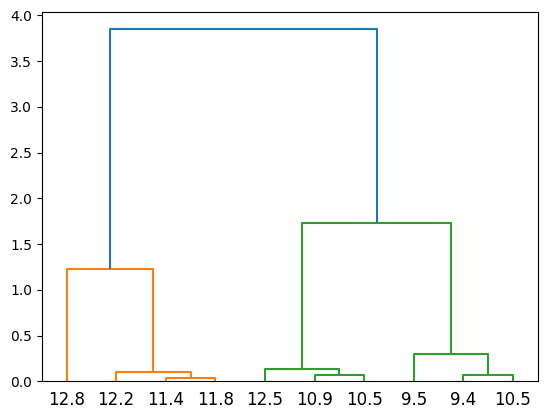

In [10]:
import pandas as pd
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
 
# Importer les données
data = pd.read_csv("cha.csv", index_col=0)
 
# Calculer la matrice de distance
distance_matrix = pdist(data, metric='euclidean')
 
# Effectuer l'analyse CAH avec la méthode de linkage ward
cah = linkage(distance_matrix, method='ward')
 
# Afficher le dendrogramme
dendrogram(cah, labels=data.index)


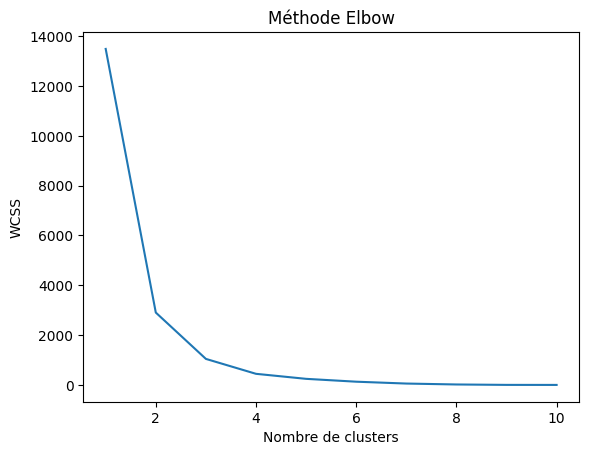

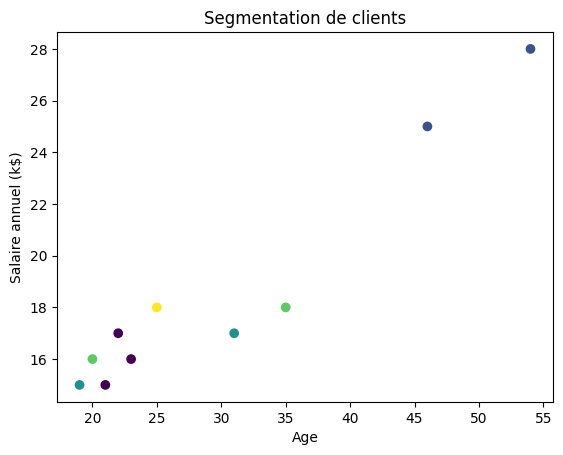

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Importer les données
data = pd.read_csv("data.csv")
 
# Sélectionner les colonnes pertinentes pour l'analyse
X = data.iloc[:, [0, 1, 2]].values
 
# Utiliser la méthode Elbow pour trouver le nombre optimal de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Méthode Elbow')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.show()
 
# Appliquer l'algorithme K-means avec le nombre optimal de clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
 
# Visualiser les clusters
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.title('Segmentation de clients')
plt.xlabel('Age')
plt.ylabel('Salaire annuel (k$)')
plt.show()


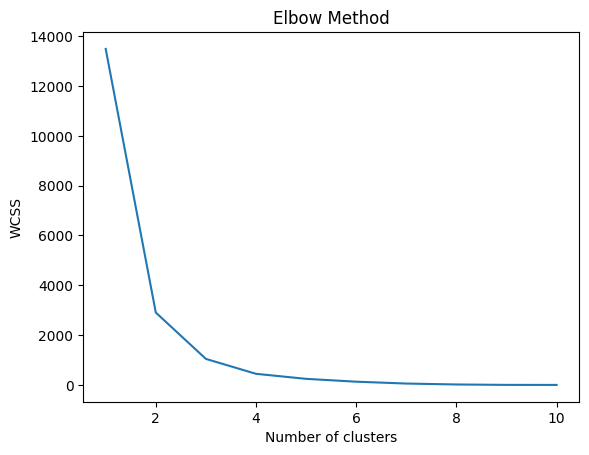

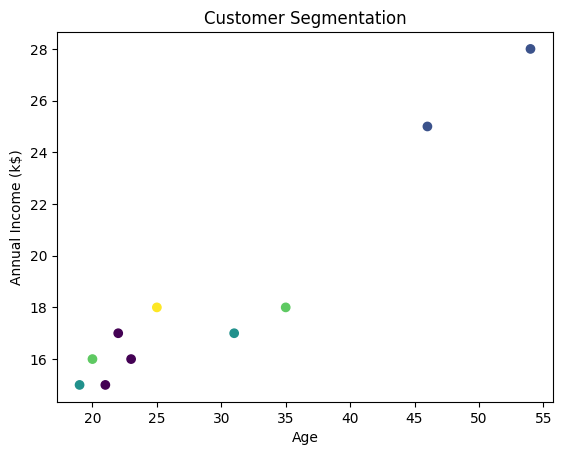

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Import the data
data = pd.read_csv("data.csv")

# Select the relevant columns for analysis
X = data.iloc[:, [0, 1, 2]].values

# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means algorithm with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# Visualize the clusters
plt.scatter(X[:,0], X[:,1], c=pred_y)
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()


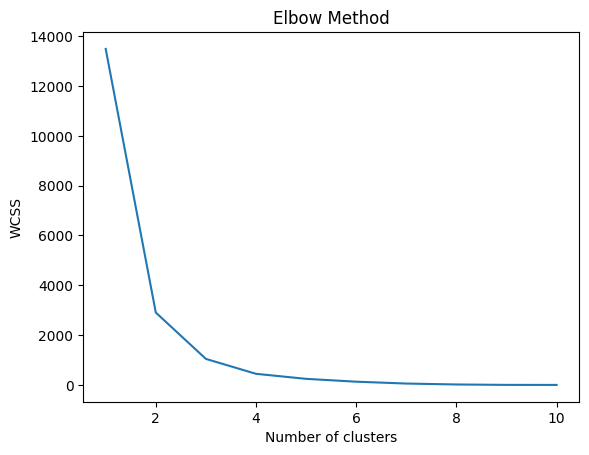

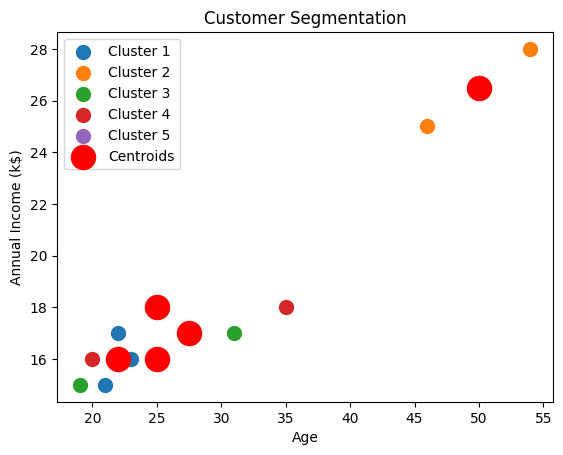

In [9]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Import the data
data = pd.read_csv("data.csv")

# Select the relevant columns for analysis
X = data.iloc[:, [0, 1, 2]].values

# Use the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means algorithm with the optimal number of clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)

# Visualize the clusters
for i in range(5):
    plt.scatter(X[pred_y == i, 0], X[pred_y == i, 1], s=100, label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.legend()
plt.show()
